In [8]:
import pickle
from sklearn.metrics import average_precision_score

In [2]:
# Load the autoencoder scores
with open('autoencoder_score.pkl', 'rb') as file:
    autoencoder_scores = pickle.load(file)

# Load the cross-entropy scores
with open('cross_entropy_score.pkl', 'rb') as file:
    cross_entropy_scores = pickle.load(file)

# Load the y_true values
with open('y_true.pkl', 'rb') as file:
    y_true = pickle.load(file)


In [4]:
# Assuming you already have autoencoder_scores and cross_entropy_scores loaded

# Define a function to perform Min-Max normalization
def min_max_normalize(scores):
    min_score = min(scores)
    max_score = max(scores)
    normalized_scores = [(x - min_score) / (max_score - min_score) for x in scores]
    return normalized_scores

# Normalize the autoencoder_scores and cross_entropy_scores
normalized_autoencoder_scores = min_max_normalize(autoencoder_scores)
normalized_cross_entropy_scores = min_max_normalize(cross_entropy_scores)



In [28]:
weights_to_try = [i / 10 for i in range(11)]  # Weights from 0.0 to 1.0 in increments of 0.1

best_weight = None
best_average_precision = -1

for weight in weights_to_try:
    # Calculate the weighted sum of the scores
    score_sums = [(weight * ae_score) + ((1 - weight) * ce_score) for ae_score, ce_score in zip(normalized_autoencoder_scores, normalized_cross_entropy_scores)]

    # Calculate the average_precision_score for this combination of weights
    average_precision = average_precision_score(y_true, score_sums)

    # Print the current weight and average_precision_score
    print(f"CE Weight: {weight}, Average Precision Score: {average_precision}")

    # Check if this combination of weights gives a better result
    if average_precision > best_average_precision:
        best_average_precision = average_precision
        best_weight = weight

print(f"Best Weight: {best_weight}")
print(f"Best Average Precision Score: {best_average_precision}")

CE Weight: 0.0, Average Precision Score: 0.9184282248570583
CE Weight: 0.1, Average Precision Score: 0.9178834718407604
CE Weight: 0.2, Average Precision Score: 0.916162432510499
CE Weight: 0.3, Average Precision Score: 0.9134562230627382
CE Weight: 0.4, Average Precision Score: 0.909540632949631
CE Weight: 0.5, Average Precision Score: 0.9049877067226583
CE Weight: 0.6, Average Precision Score: 0.8996649983778667
CE Weight: 0.7, Average Precision Score: 0.8930834000697391
CE Weight: 0.8, Average Precision Score: 0.885529087782825
CE Weight: 0.9, Average Precision Score: 0.876316514567783
CE Weight: 1.0, Average Precision Score: 0.8652350083045975
Best Weight: 0.0
Best Average Precision Score: 0.9184282248570583


In [22]:
oos_test_scores = score_sums[len(y_true)-sum(y_true):]

In [23]:
test_scores = score_sums[:len(y_true)-sum(y_true)]

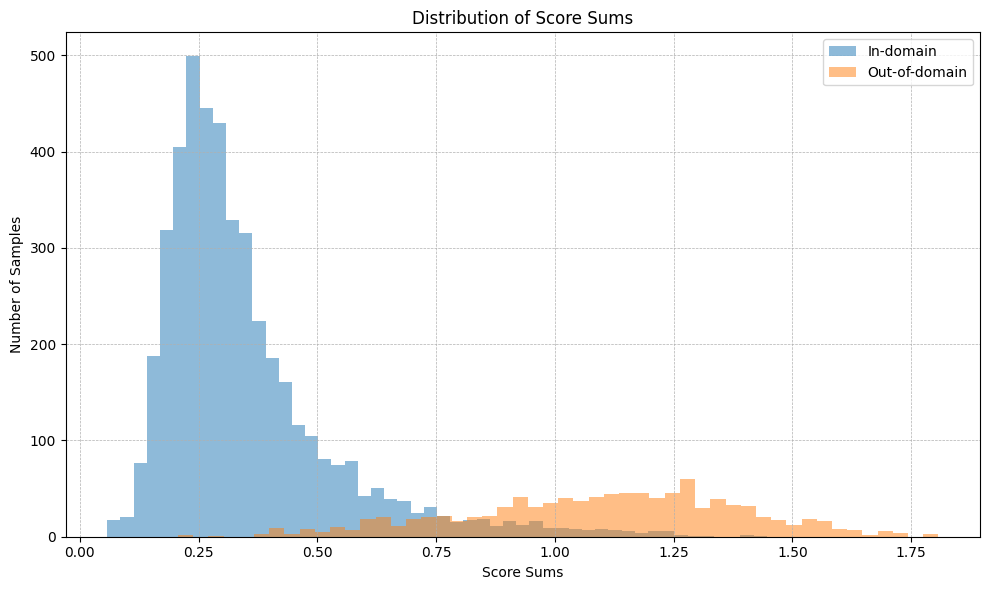

In [26]:
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot the histograms
plt.hist(test_scores, bins=50, alpha=0.5, label='In-domain')
plt.hist(oos_test_scores, bins=50, alpha=0.5, label='Out-of-domain')

# Add legend, title, and labels
plt.legend(loc='upper right')
plt.title('Distribution of Score Sums')
plt.xlabel('Score Sums')
plt.ylabel('Number of Samples')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()
